In [ ]:
import pandas as pd
import librosa
import numpy as np

from sklearn.model_selection import train_test_split 

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.optimizers import Adam
from sklearn import metrics 
 
from datetime import datetime 
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
##################### Model 1

Prepare Data

In [ ]:
# import data
mfcc_noise_only = pd.read_csv('/content/drive/MyDrive/GA/capstone/mfcc_noise_only.csv')

# convert string like values back to numpy array. (1,6960)
mfcc_noise_only['feature'] = mfcc_noise_only.apply(lambda x: np.fromstring(x['new_feature'], dtype=float, sep=','),axis=1)

# reshape the (1,6960) to (40,174)
mfcc_noise_only['feature'] = mfcc_noise_only.apply(lambda x: x['feature'].reshape(40,174),axis=1)

# keep only the 
mfcc_noise_only = mfcc_noise_only.drop('new_feature', axis = 1)

In [ ]:
# make a (8732, 40, 174) numpy array as the X
X = np.array(mfcc_noise_only['feature'].tolist())
y = np.array(pd.get_dummies(mfcc_noise_only['class_label']))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 3)

lengh_X_train = len(X_train)
lengh_X_test = len(X_test)
input_rows = X.shape[1]
input_columns = X.shape[2]
input_channels = 1

X_train = X_train.reshape(lengh_X_train, input_rows, input_columns,input_channels)
X_test = X_test.reshape(lengh_X_test, input_rows, input_columns,input_channels)

In [ ]:
classes = np.array(['air_conditioner', 'car_horn', 'children_playing', 'dog_bark',
       'drilling', 'engine_idling', 'gun_shot', 'jackhammer', 'siren',
       'street_music'])

In [ ]:
# Construct model 
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, input_shape=(input_rows, input_columns, input_channels), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(GlobalAveragePooling2D())

model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 39, 173, 16)       80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 19, 86, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 19, 86, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 18, 85, 32)        2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 9, 42, 32)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 9, 42, 32)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 41, 64)         8

In [ ]:
num_epochs = 69
num_batch_size = 64

start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/69
123/123 [==============================] - 18s 10ms/step - loss: 3.5439 - accuracy: 0.2518 - val_loss: 1.6771 - val_accuracy: 0.4783
Epoch 2/69
123/123 [==============================] - 1s 6ms/step - loss: 1.3947 - accuracy: 0.5064 - val_loss: 1.4047 - val_accuracy: 0.5309
Epoch 3/69
123/123 [==============================] - 1s 6ms/step - loss: 1.2123 - accuracy: 0.5720 - val_loss: 1.2936 - val_accuracy: 0.5709
Epoch 4/69
123/123 [==============================] - 1s 6ms/step - loss: 1.0298 - accuracy: 0.6384 - val_loss: 1.1537 - val_accuracy: 0.6236
Epoch 5/69
123/123 [==============================] - 1s 6ms/step - loss: 0.9461 - accuracy: 0.6726 - val_loss: 0.9883 - val_accuracy: 0.6968
Epoch 6/69
123/123 [==============================] - 1s 6ms/step - loss: 0.8588 - accuracy: 0.7060 - val_loss: 0.9386 - val_accuracy: 0.7094
Epoch 7/69
123/123 [==============================] - 1s 6ms/step - loss: 0.7775 - accuracy: 0.7364 - val_loss: 0.8529 - val_accuracy: 0.7517
Epoc

In [ ]:
# Evaluating the model on the training and testing set
train_score = model.evaluate(X_train, y_train, verbose=0)
test_score = model.evaluate(X_test, y_test, verbose=0)

print(f'Loss values on training data set is {train_score[0]}, and accuracy is {train_score[1]}')
print(f'Loss values on testing data set is {test_score[0]}, and accuracy is {test_score[1]}')

Loss values on training data set is 0.07496549934148788, and accuracy is 0.9773479104042053
Loss values on testing data set is 0.27945375442504883, and accuracy is 0.9153317809104919


In [ ]:
test_preds_1 = pd.DataFrame((model.predict(X_test) > 0.5).astype('int32'))
test_preds_1 = test_preds_1.idxmax(axis=1).tolist()
y_test_df = pd.DataFrame(y_test)
y_test_true = y_test_df.idxmax(axis=1).tolist()

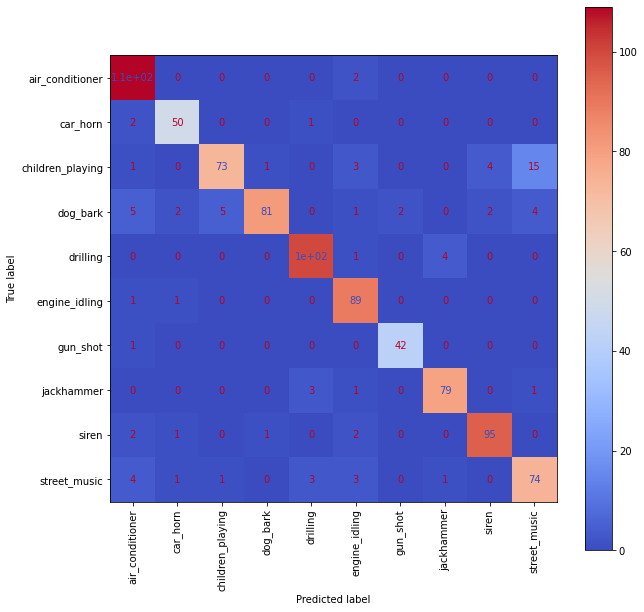

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
cm = confusion_matrix(y_test_true, test_preds_1)
cmp = ConfusionMatrixDisplay(cm,classes)
fig, ax = plt.subplots(figsize=(10, 10))

cmp.plot(ax=ax,cmap='coolwarm');

plt.xticks(rotation = 90);

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Thu May 13 05:56:52 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
##############

In [ ]:
############ model 2

MODEL 2

In [ ]:
combined_voice = pd.read_csv('/content/drive/MyDrive/GA/capstone/mfcc_combined_voice.csv')

In [ ]:
combined_voice['feature'] = combined_voice.apply(lambda x: np.fromstring(x['new_feature'], dtype=float, sep=','),axis=1)

In [ ]:
combined_voice['feature'] = combined_voice.apply(lambda x: x['feature'].reshape(40,222),axis=1)

In [ ]:
combined_voice.drop('new_feature', axis=1, inplace=True)

In [ ]:
# make a (8732, 40, 174) numpy array as the X
X = np.array(mfcc_noise_only['feature'].tolist())
y = np.array(pd.get_dummies(mfcc_noise_only['class_label']))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 3)

lengh_X_train = len(X_train)
lengh_X_test = len(X_test)
input_rows = X.shape[1]
input_columns = X.shape[2]
input_channels = 1

X_train = X_train.reshape(lengh_X_train, input_rows, input_columns,input_channels)
X_test = X_test.reshape(lengh_X_test, input_rows, input_columns,input_channels)

In [ ]:
# reshape the features like prevoiou one
X_c = np.array(combined_voice['feature'].tolist())
y_c = np.array(pd.get_dummies(combined_voice['class_label']))

X_c_train, X_c_test, y_c_train, y_c_test = train_test_split(X_c, y_c, test_size=0.1, random_state = 3)

lengh_X_c_train = len(X_c_train)
lengh_X_c_test = len(X_c_test)
c_input_rows = X_c.shape[1]
c_input_columns = X_c.shape[2]
input_channels = 1 

X_c_train = X_c_train.reshape(lengh_X_c_train, c_input_rows, c_input_columns, input_channels)
X_c_test = X_c_test.reshape(lengh_X_c_test, c_input_rows, c_input_columns, input_channels)

In [ ]:
# Construct model 
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, input_shape=(c_input_rows, c_input_columns, input_channels), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(GlobalAveragePooling2D())

model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
epochs = 69
batch_size = 128

start = datetime.now()

model.fit(X_c_train, y_c_train, batch_size=batch_size, epochs=epochs, validation_data=(X_c_test, y_c_test), verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/69
62/62 [==============================] - 2s 20ms/step - loss: 7.6800 - accuracy: 0.1237 - val_loss: 2.1144 - val_accuracy: 0.2334
Epoch 2/69
62/62 [==============================] - 1s 15ms/step - loss: 2.0038 - accuracy: 0.2801 - val_loss: 1.8066 - val_accuracy: 0.3101
Epoch 3/69
62/62 [==============================] - 1s 15ms/step - loss: 1.6820 - accuracy: 0.3796 - val_loss: 1.6538 - val_accuracy: 0.4050
Epoch 4/69
62/62 [==============================] - 1s 15ms/step - loss: 1.5446 - accuracy: 0.4339 - val_loss: 1.5570 - val_accuracy: 0.4302
Epoch 5/69
62/62 [==============================] - 1s 15ms/step - loss: 1.4564 - accuracy: 0.4734 - val_loss: 1.5686 - val_accuracy: 0.4096
Epoch 6/69
62/62 [==============================] - 1s 15ms/step - loss: 1.4204 - accuracy: 0.4910 - val_loss: 1.4800 - val_accuracy: 0.4554
Epoch 7/69
62/62 [==============================] - 1s 15ms/step - loss: 1.3075 - accuracy: 0.5364 - val_loss: 1.4246 - val_accuracy: 0.5069
Epoch 8/69
62

In [ ]:
train_score = model.evaluate(X_c_train, y_c_train, verbose=0)
test_score = model.evaluate(X_c_test, y_c_test, verbose=0)

print(f'Loss values on training data set is {train_score[0]}, and accuracy is {train_score[1]}')
print(f'Loss values on testing data set is {test_score[0]}, and accuracy is {test_score[1]}')

Loss values on training data set is 0.2980222702026367, and accuracy is 0.9041740894317627
Loss values on testing data set is 0.4563806653022766, and accuracy is 0.8512585759162903


In [ ]:
test_preds_2 = pd.DataFrame((model.predict(X_c_test) > 0.5).astype('int32'))
test_preds_2 = test_preds_2.idxmax(axis=1).tolist()
y_test_df_2 = pd.DataFrame(y_c_test)
y_test_true_2 = y_test_df_2.idxmax(axis=1).tolist()

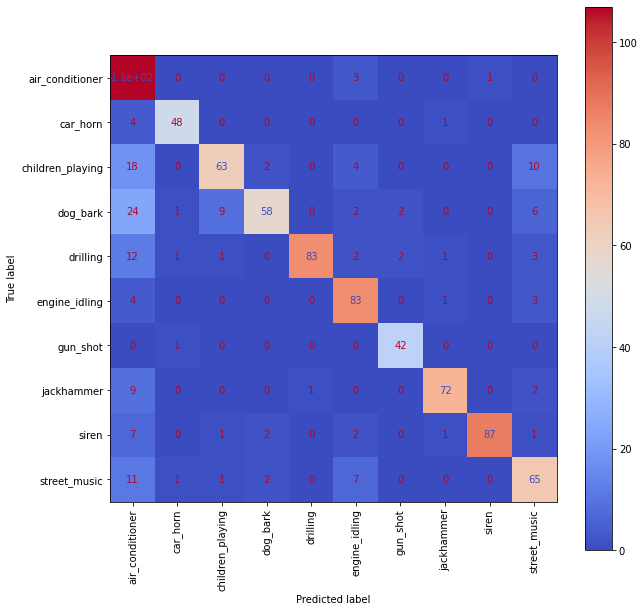

In [ ]:
cm = confusion_matrix(y_test_true_2, test_preds_2)
cmp = ConfusionMatrixDisplay(cm,classes)
fig, ax = plt.subplots(figsize=(10, 10))

cmp.plot(ax=ax,cmap='coolwarm');

plt.xticks(rotation = 90);

Save the models

In [ ]:
predict_test = X_c_test[0].reshape(1,40,222,1)

In [ ]:
test_result = (model.predict(predict_test) > 0.5).astype('int32').reshape(-1)

In [ ]:
classes_cat = pd.get_dummies(combined_voice['class_label']).columns

In [ ]:
test_result

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
classes_cat[test_result == 1][0]

'children_playing'

In [ ]:
classes_cat

Index(['air_conditioner', 'car_horn', 'children_playing', 'dog_bark',
       'drilling', 'engine_idling', 'gun_shot', 'jackhammer', 'siren',
       'street_music'],
      dtype='object')

In [ ]:
def make_prediction(file_path):
  voice, voice_rate = librosa.load(file_path, res_type='kaiser_fast')
  mfcc = librosa.feature.mfcc(y=voice,sr=voice_rate,n_mfcc=40)
  x = mfcc.reshape(1,40,222,1)

  pred = (model.predict(x) > 0.5).astype('int32').reshape(-1)

  result = classes_cat[pred == 1][0]

  return result

In [ ]:
make_prediction('/content/drive/MyDrive/GA/capstone/test_combine.wav')

'children_playing'

In [ ]:
model.save('/content/drive/MyDrive/GA/capstone/capstone.h5')


In [ ]:
with open("/content/drive/MyDrive/GA/capstone/capstone.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
model.save_weights("/content/drive/MyDrive/GA/capstone/capstone.h5")